In [2]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [3]:
url_train = 'https://raw.githubusercontent.com/hkfuoc98/Imaginary-Data-Projects/master/Loan_Prediction/train_ctrUa4K_Phuoc.csv'
url_test = 'https://raw.githubusercontent.com/hkfuoc98/Imaginary-Data-Projects/master/Loan_Prediction/test_lAUu6dG_Phuoc.csv'
train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
print(train.shape,test.shape)

(614, 13) (367, 12)


In [6]:
for i in range(train.shape[1]):
    print(train.iloc[:,i].value_counts())

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: L

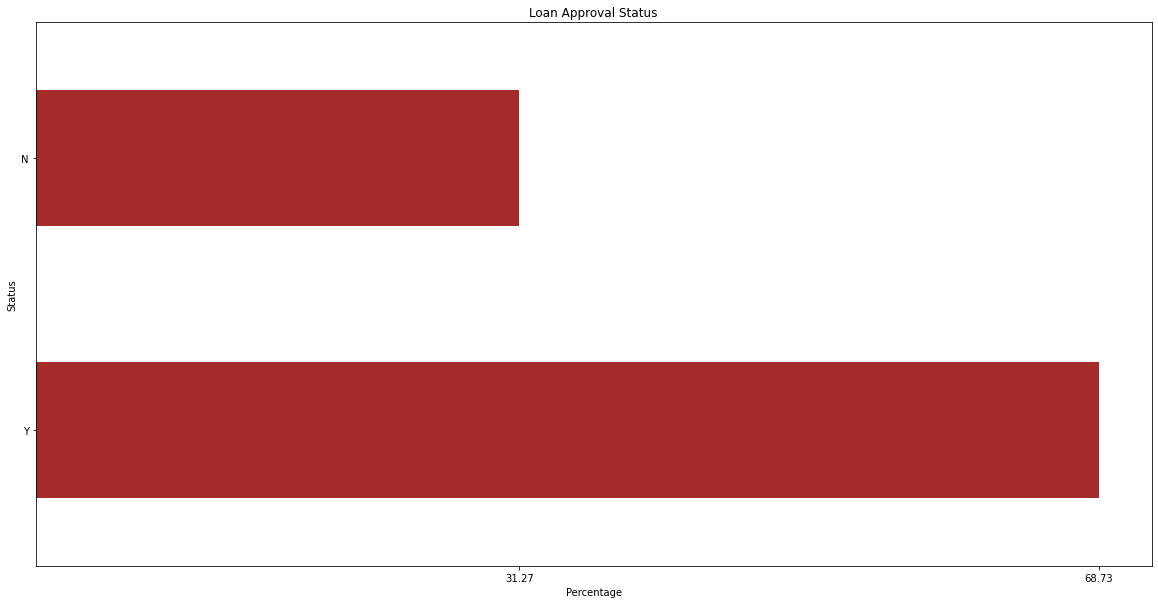

In [7]:
(train.Loan_Status.value_counts()/train.shape[0]*100).plot(kind = 'barh',color = '#A52A2A',figsize = (20,10))
plt.title('Loan Approval Status')
plt.xlabel('Percentage')
plt.ylabel('Status')
plt.xticks(train.Loan_Status.value_counts()/train.shape[0]*100)
plt.savefig('Loan Prediction_Approval Status.jpeg')
plt.show()

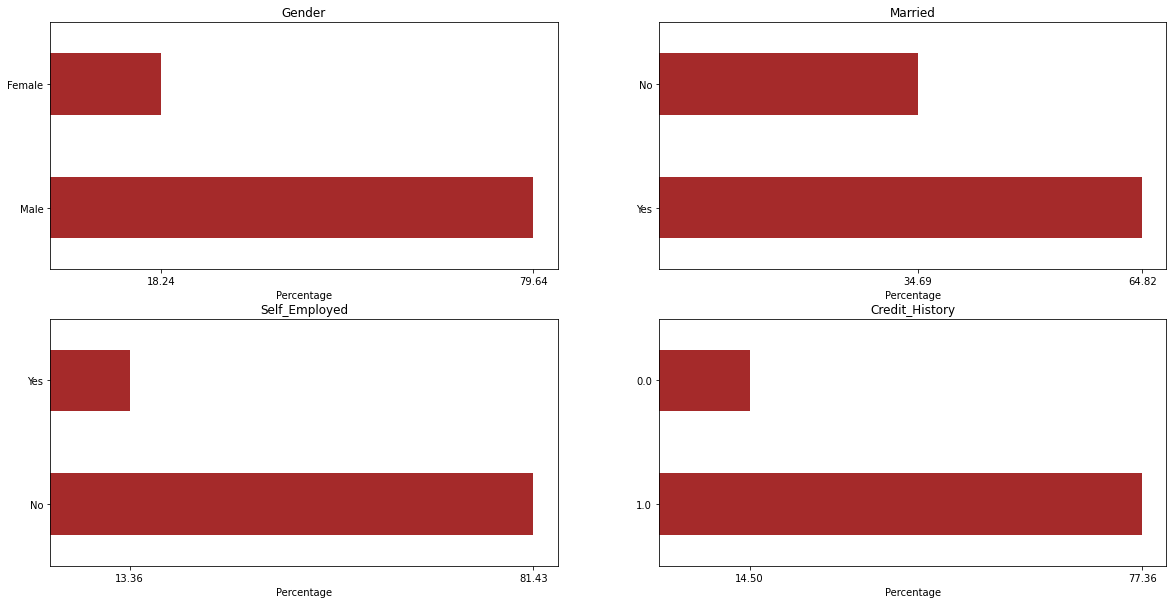

In [8]:
# Categorical: Gender | Married |Self_Employed | Credit_History
plt.figure(1)
plt.subplot(221)
(train.Gender.value_counts()/train.shape[0]*100).plot(kind = 'barh',color = '#A52A2A',figsize = (20,10))
plt.title('Gender')
plt.xlabel('Percentage')
plt.xticks(train.Gender.value_counts()/train.shape[0]*100)

plt.subplot(222)
(train.Married.value_counts()/train.shape[0]*100).plot(kind = 'barh',color = '#A52A2A',figsize = (20,10))
plt.title('Married')
plt.xlabel('Percentage')
plt.xticks(train.Married.value_counts()/train.shape[0]*100)

plt.subplot(223)
(train.Self_Employed.value_counts()/train.shape[0]*100).plot(kind = 'barh',color = '#A52A2A',figsize = (20,10))
plt.title('Self_Employed')
plt.xlabel('Percentage')
plt.xticks(train.Self_Employed.value_counts()/train.shape[0]*100)

plt.subplot(224)
(train.Credit_History.value_counts()/train.shape[0]*100).plot(kind = 'barh',color = '#A52A2A',figsize = (20,10))
plt.title('Credit_History')
plt.xlabel('Percentage')
plt.xticks(train.Credit_History.value_counts()/train.shape[0]*100)

plt.savefig('Loan Prediction_Categorical Variables.jpeg')
plt.show()

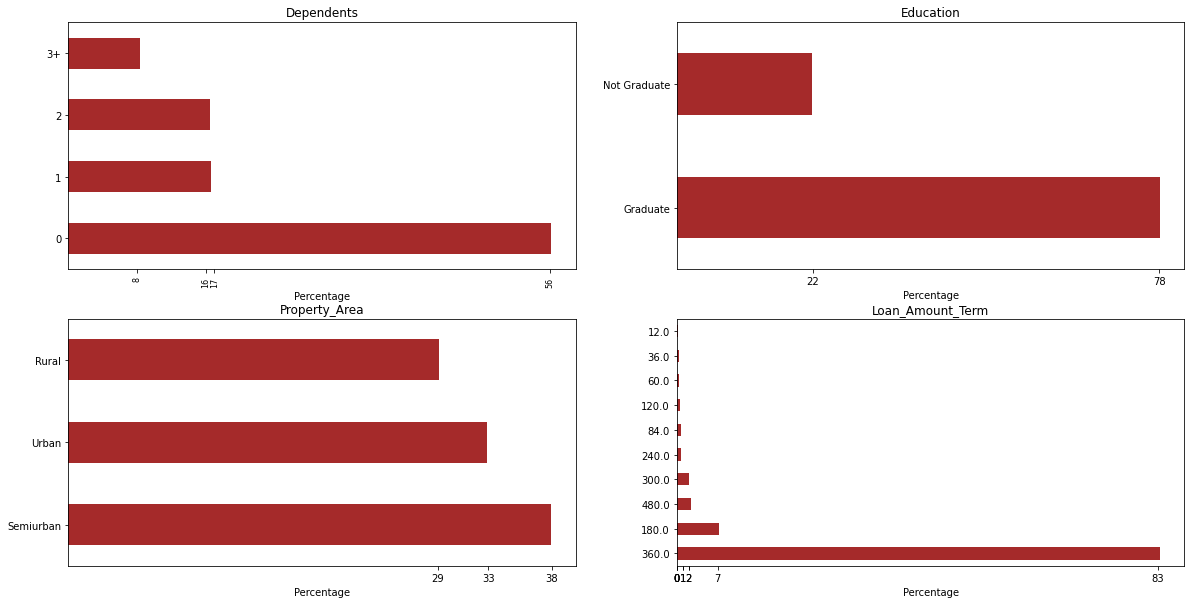

In [50]:
# Ordinal: Dependents | Education | Property_Area | Loan_Amount_Term
trainTotalIncone = train.ApplicantIncome + train.CoapplicantIncome
plt.figure(1)
chart1 = plt.subplot(221)
(train.Dependents.value_counts()/train.shape[0]*100).plot(kind = 'barh',color = '#A52A2A',figsize = (20,10))
plt.title('Dependents')
plt.xlabel('Percentage')
plt.xticks(round(train.Dependents.value_counts()/train.shape[0]*100))
plt.setp(chart1.get_xticklabels(), fontsize=8, rotation='vertical')

plt.subplot(222)
(train.Education.value_counts()/train.shape[0]*100).plot(kind = 'barh',color = '#A52A2A',figsize = (20,10))
plt.title('Education')
plt.xlabel('Percentage')
plt.xticks(round(train.Education.value_counts()/train.shape[0]*100))

plt.subplot(223)
(train.Property_Area.value_counts()/train.shape[0]*100).plot(kind = 'barh',color = '#A52A2A',figsize = (20,10))
plt.title('Property_Area')
plt.xlabel('Percentage')
plt.xticks(round(train.Property_Area.value_counts()/train.shape[0]*100))

plt.subplot(224)
(train.Loan_Amount_Term.value_counts()/train.shape[0]*100).plot(kind = 'barh',color = '#A52A2A',figsize = (20,10))
plt.title('Loan_Amount_Term')
plt.xlabel('Percentage')
plt.xticks(round(train.Loan_Amount_Term.value_counts()/train.shape[0]*100))

plt.savefig('Loan Prediction_Ordinal Variables.jpeg')
plt.show()

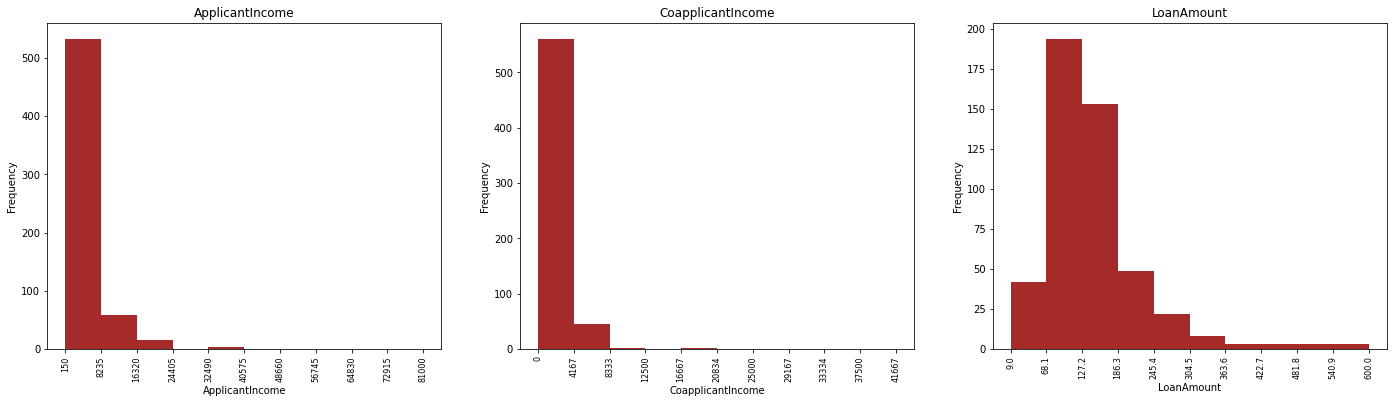

In [10]:
# Numberial: ApplicantIncome | CoapplicantIncome | LoanAmount
plt.figure(1)
chart1 = plt.subplot(131) 
(train.ApplicantIncome).plot(kind = 'hist',color = '#A52A2A',figsize = (24,6))
plt.title('ApplicantIncome')
plt.xlabel('ApplicantIncome')
count,edges = np.histogram(train.ApplicantIncome)
plt.xticks(edges)
plt.setp(chart1.get_xticklabels(), fontsize=8, rotation='vertical')

chart2 = plt.subplot(132) 
(train.CoapplicantIncome).plot(kind = 'hist',color = '#A52A2A',figsize = (24,6))
plt.title('CoapplicantIncome')
plt.xlabel('CoapplicantIncome')
count,edges = np.histogram(train.CoapplicantIncome)
plt.xticks(edges)
plt.setp(chart2.get_xticklabels(), fontsize=8, rotation='vertical')

chart3 = plt.subplot(133)
df = train.dropna()
(df.LoanAmount).plot(kind = 'hist',color = '#A52A2A',figsize = (24,6))
plt.title('LoanAmount')
plt.xlabel('LoanAmount')
count,edges = np.histogram(df.LoanAmount)
plt.xticks(edges)
plt.setp(chart3.get_xticklabels(), fontsize=8, rotation='vertical')

plt.savefig('Loan Prediction_Numberial Variables.jpeg')
plt.show()

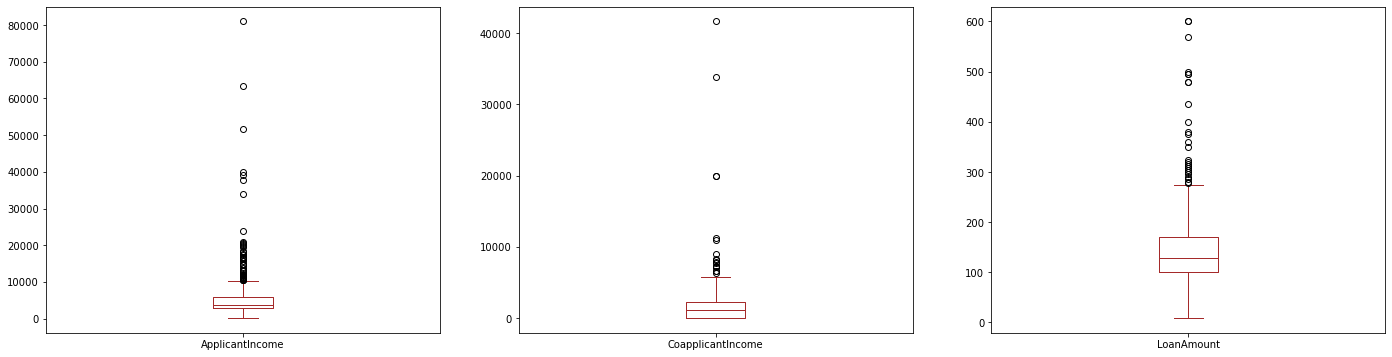

In [49]:
# Numberial: ApplicantIncome | CoapplicantIncome | LoanAmount
plt.figure(1)
chart1 = plt.subplot(131) 
(train.ApplicantIncome).plot(kind = 'box',color = '#A52A2A',figsize = (24,6))

chart2 = plt.subplot(132) 
(train.CoapplicantIncome).plot(kind = 'box',color = '#A52A2A',figsize = (24,6))

chart3 = plt.subplot(133)
df = train.dropna()
(df.LoanAmount).plot(kind = 'box',color = '#A52A2A',figsize = (24,6))

plt.savefig('Loan Prediction_Numberial Variables.jpeg')
plt.show()

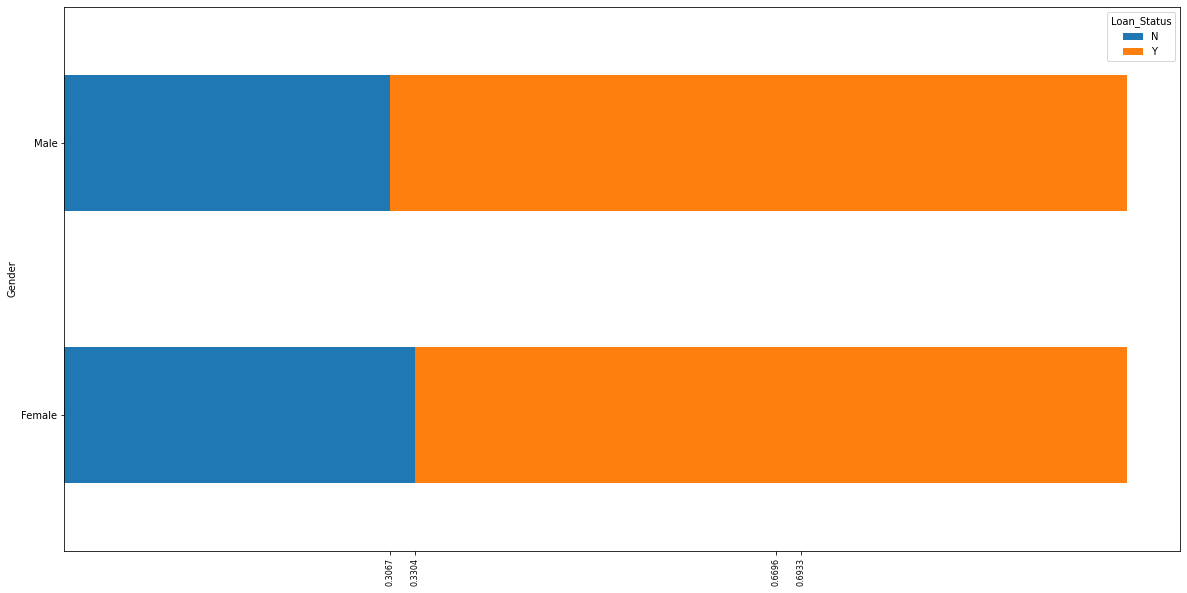

In [114]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) # PIVOT
chart1 = Gender.div(Gender.sum(1).astype(float),axis = 0).plot(kind = 'barh',stacked = True, figsize = (20,10))
plt.xticks(Gender.div(Gender.sum(1).astype(float),axis = 0).values.ravel())
plt.setp(chart1.get_xticklabels(), fontsize=8, rotation='vertical')
plt.savefig('Loan Prediction_Gender vs Loan_Status.jpeg')
plt.show()

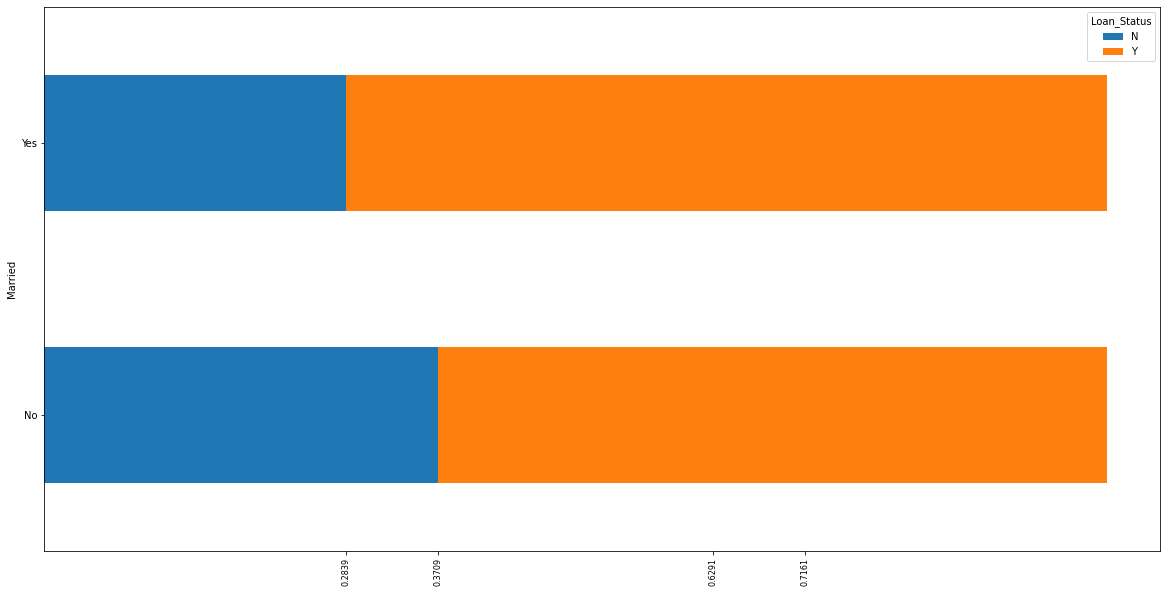

In [113]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) # PIVOT
chart1 = Married.div(Married.sum(1).astype(float),axis = 0).plot(kind = 'barh',stacked = True, figsize = (20,10))
plt.xticks(Married.div(Married.sum(1).astype(float),axis = 0).values.ravel())
plt.setp(chart1.get_xticklabels(), fontsize=8, rotation='vertical')
plt.savefig('Loan Prediction_Married vs Loan_Status.jpeg')
plt.show()

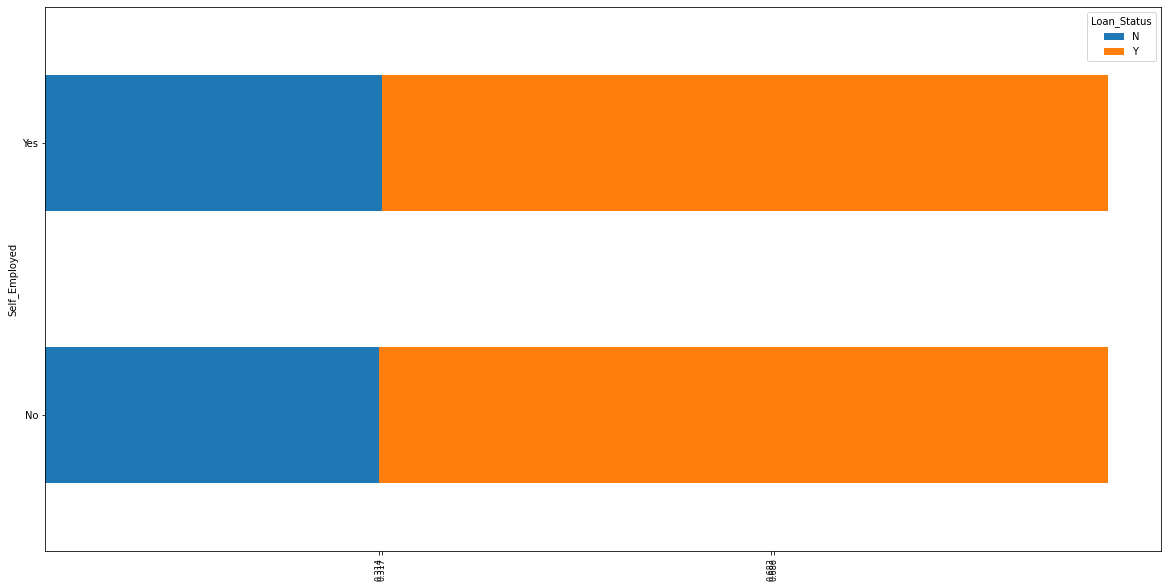

In [112]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) # PIVOT
chart1 = Self_Employed.div(Self_Employed.sum(1).astype(float),axis = 0).plot(kind = 'barh',stacked = True, figsize = (20,10))
plt.xticks(Self_Employed.div(Self_Employed.sum(1).astype(float),axis = 0).values.ravel())
plt.setp(chart1.get_xticklabels(), fontsize=8, rotation='vertical')
plt.savefig('Loan Prediction_Self_Employed vs Loan_Status.jpeg')
plt.show()

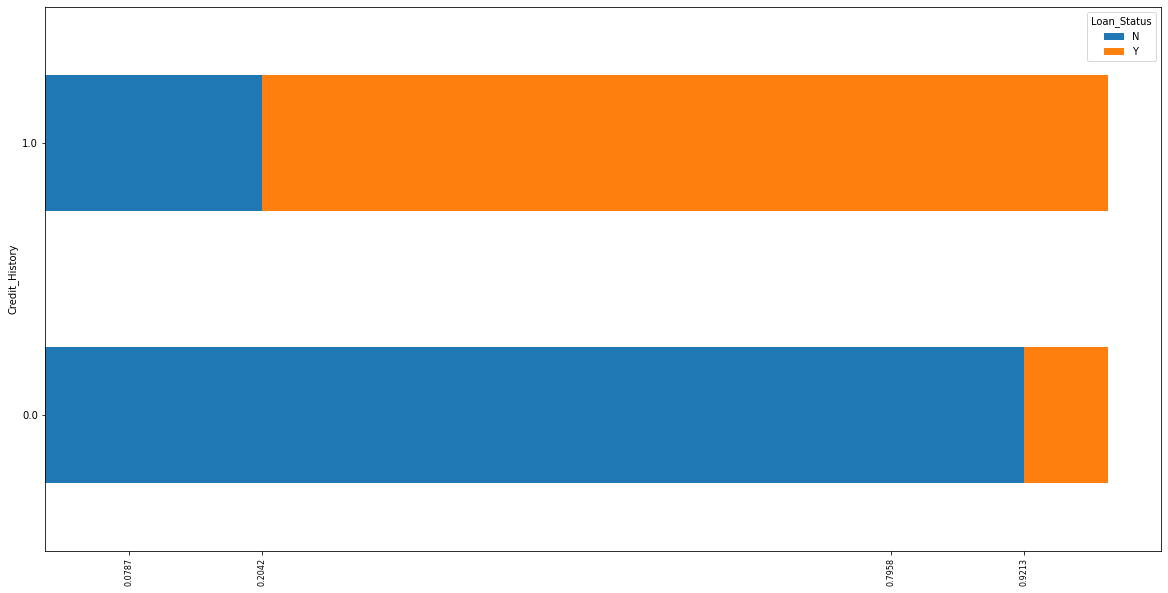

In [111]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) # PIVOT
chart1 = Credit_History.div(Credit_History.sum(1).astype(float),axis = 0).plot(kind = 'barh',stacked = True, figsize = (20,10))
plt.xticks(Credit_History.div(Credit_History.sum(1).astype(float),axis = 0).values.ravel())
plt.setp(chart1.get_xticklabels(), fontsize=8, rotation='vertical')
plt.savefig('Loan Prediction_Credit_History vs Loan_Status.jpeg')
plt.show()

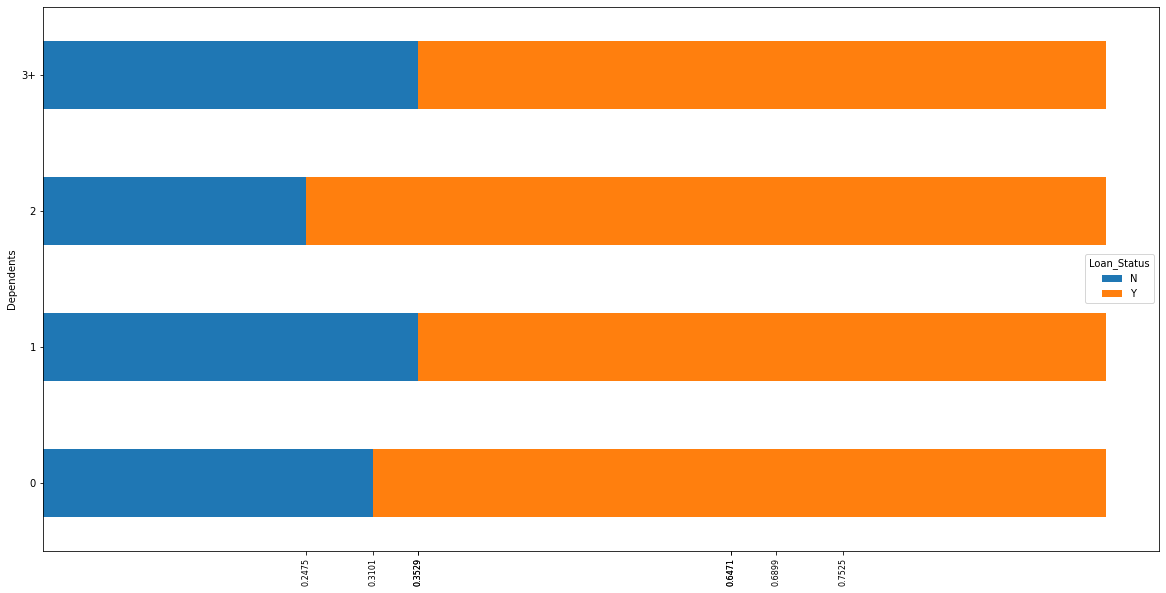

In [110]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) # PIVOT
chart1 = Dependents.div(Dependents.sum(1).astype(float),axis = 0).plot(kind = 'barh',stacked = True, figsize = (20,10))
plt.xticks(Dependents.div(Dependents.sum(1).astype(float),axis = 0).values.ravel())
plt.setp(chart1.get_xticklabels(), fontsize=8, rotation='vertical')
plt.savefig('Loan Prediction_Dependents vs Loan_Status.jpeg')
plt.show()

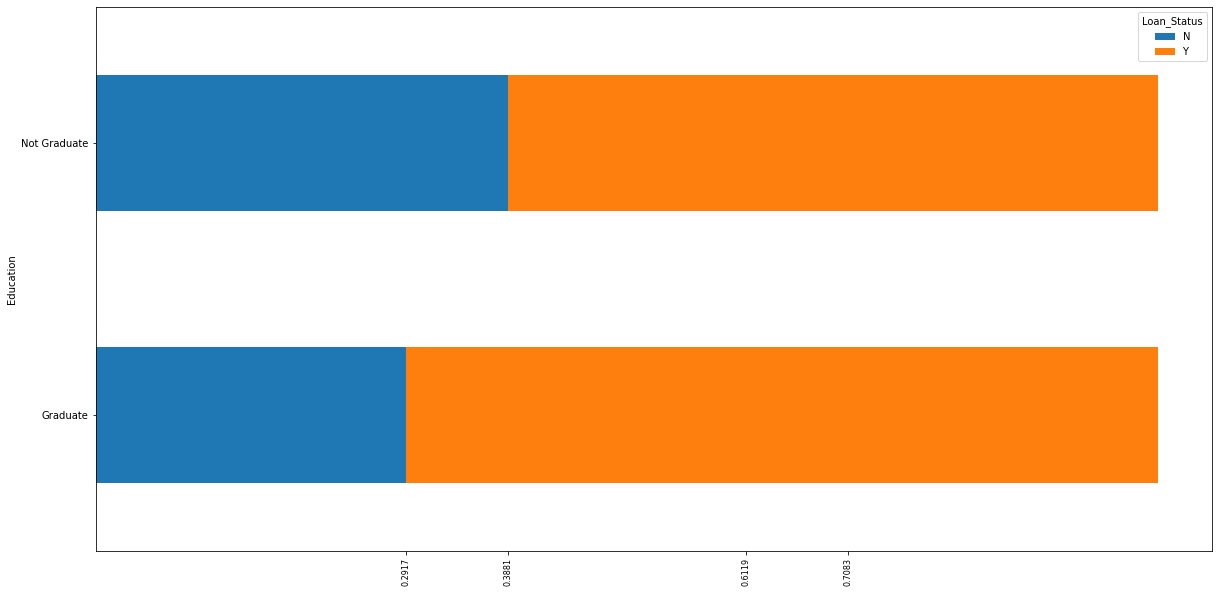

In [109]:
Education=pd.crosstab(train['Education'],train['Loan_Status']) # PIVOT
chart1 = Education.div(Education.sum(1).astype(float),axis = 0).plot(kind = 'barh',stacked = True, figsize = (20,10))
plt.xticks(Education.div(Education.sum(1).astype(float),axis = 0).values.ravel())
plt.setp(chart1.get_xticklabels(), fontsize=8, rotation='vertical')
plt.savefig('Loan Prediction_Education vs Loan_Status.jpeg')
plt.show()

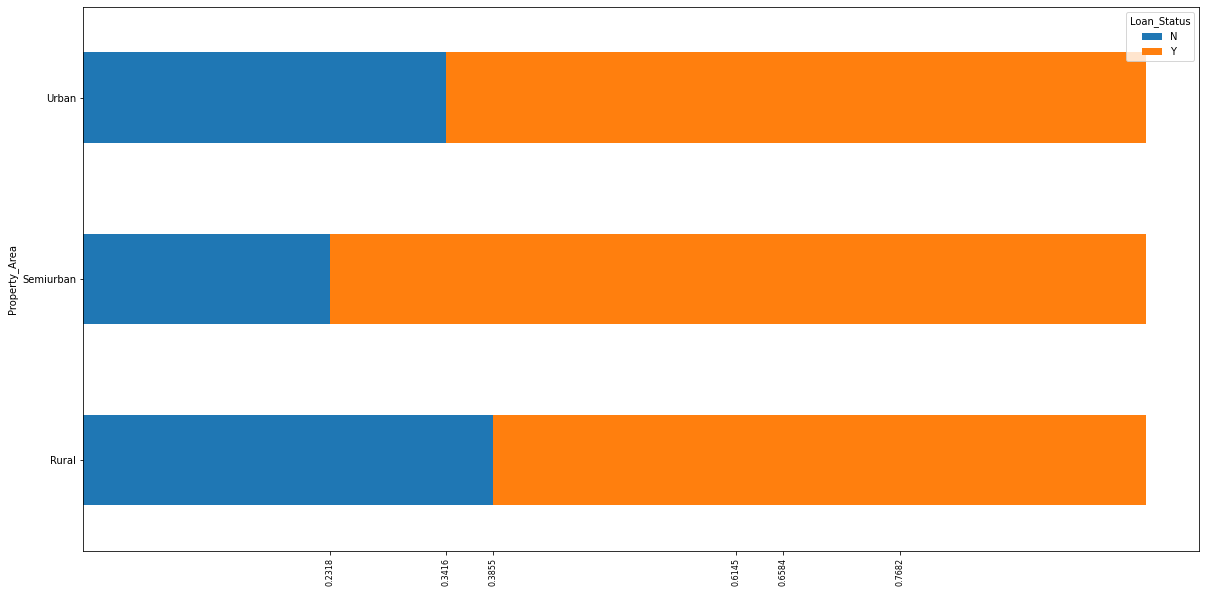

In [108]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) # PIVOT
chart1 = Property_Area.div(Property_Area.sum(1).astype(float),axis = 0).plot(kind = 'barh',stacked = True, figsize = (20,10))
plt.xticks(Property_Area.div(Property_Area.sum(1).astype(float),axis = 0).values.ravel())
plt.setp(chart1.get_xticklabels(), fontsize=8, rotation='vertical')
plt.savefig('Loan Prediction_Property_Area vs Loan_Status.jpeg')
plt.show()

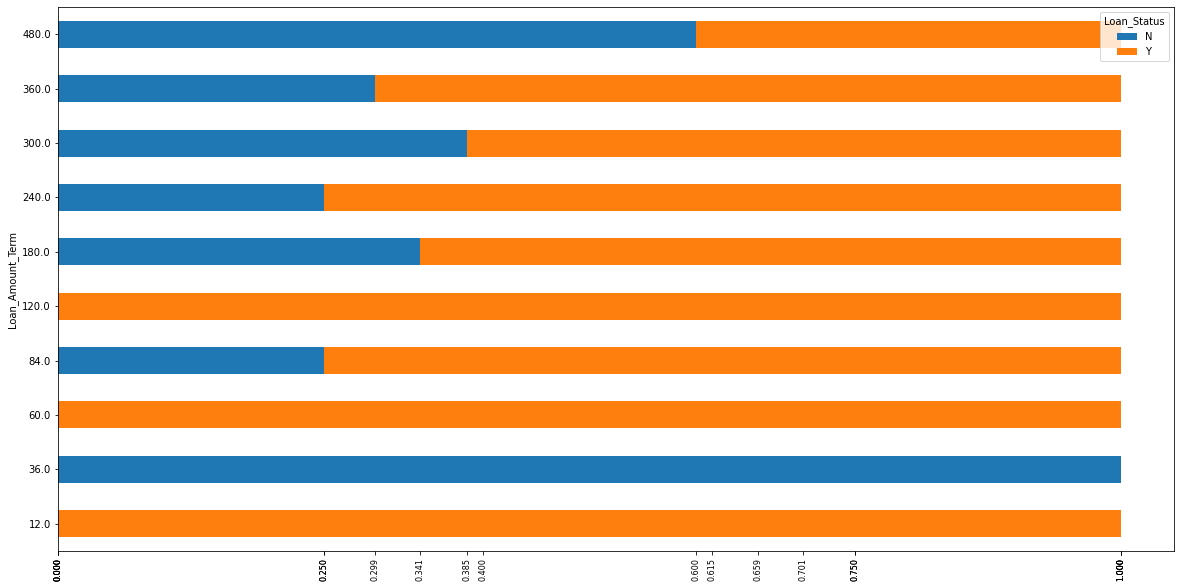

In [107]:
Loan_Amount_Term=pd.crosstab(train['Loan_Amount_Term'],train['Loan_Status']) # PIVOT
chart1 = Loan_Amount_Term.div(Loan_Amount_Term.sum(1).astype(float),axis = 0).plot(kind = 'barh',stacked = True, figsize = (20,10))
plt.xticks(Loan_Amount_Term.div(Loan_Amount_Term.sum(1).astype(float),axis = 0).values.ravel())
plt.setp(chart1.get_xticklabels(), fontsize=8, rotation='vertical')
plt.savefig('Loan Prediction_Loan_Amount_Term vs Loan_Status.jpeg')
plt.show()

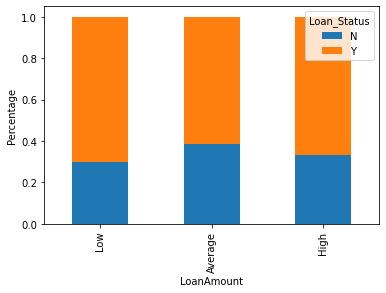

In [106]:
bins=[0,700/3,700/3*2,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.savefig('Loan Prediction_LoanAmount vs Loan_Status.jpeg')

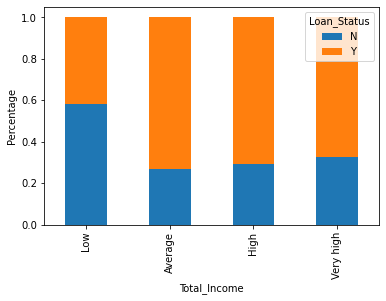

In [105]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.savefig('Loan Prediction_Total_Income vs Loan_Status.jpeg')

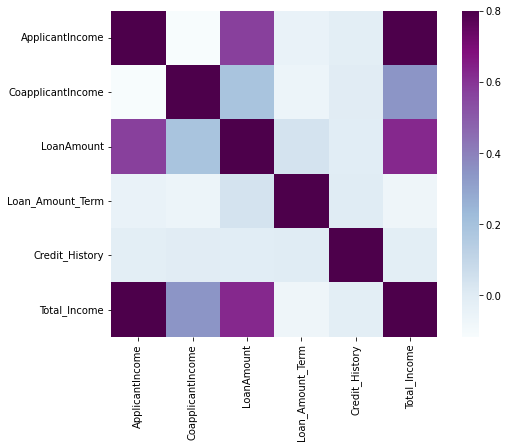

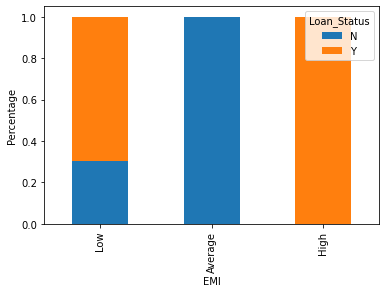

In [137]:
# min = 0.025, max = 9.25 
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
bins=[0,4,8,12]
group=['Low','Average','High']
train['EMI_bin']=pd.cut(train['EMI'],bins,labels=group)
Total_EMI_bin=pd.crosstab(train['EMI_bin'],train['Loan_Status'])
Total_EMI_bin.div(Total_EMI_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('EMI')
plt.ylabel('Percentage')
plt.savefig('Loan Prediction_EMI vs Loan_Status.jpeg')

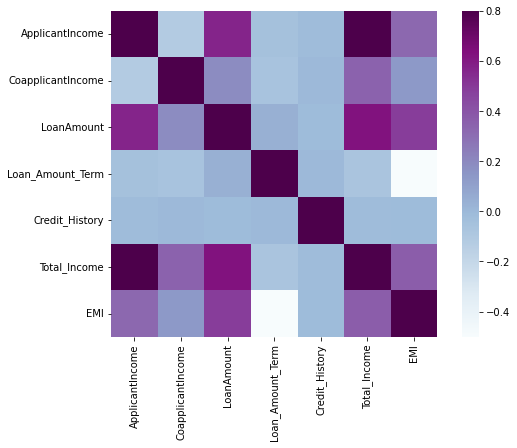

In [138]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
plt.savefig('Loan Prediction_Heatmap.jpeg')

In [141]:
train.drop(['EMI_bin','LoanAmount_bin','Total_Income_bin'],axis = 1,inplace = True)

In [142]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
EMI                  36
dtype: int64

In [145]:
print(train.shape,train.dropna().shape)

(614, 15) (480, 15)


In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
url_train = 'https://raw.githubusercontent.com/hkfuoc98/Imaginary-Data-Projects/master/Loan_Prediction/train_ctrUa4K_Phuoc.csv'
url_test = 'https://raw.githubusercontent.com/hkfuoc98/Imaginary-Data-Projects/master/Loan_Prediction/test_lAUu6dG_Phuoc.csv'
train = pd.read_csv(url_train)
test2 = pd.read_csv(url_test)

In [2]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [4]:
print(train.isnull().sum(),test.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [9]:
train['LoanAmount_Log'] = train['LoanAmount'].apply(lambda x: np.log(x) if x !=0 else 0)
train['ApplicantIncome_Log'] = train['ApplicantIncome'].apply(lambda x: np.log(x) if x !=0 else 0)
train['CoapplicantIncome_Log'] = train['CoapplicantIncome'].apply(lambda x: np.log(x) if x !=0 else 0)

test['LoanAmount_Log'] = test['LoanAmount'].apply(lambda x: np.log(x) if x !=0 else 0)
test['ApplicantIncome_Log'] = test['ApplicantIncome'].apply(lambda x: np.log(x) if x !=0 else 0)
test['CoapplicantIncome_Log'] = test['CoapplicantIncome'].apply(lambda x: np.log(x) if x !=0 else 0)

In [161]:
train.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
LoanAmount_Log         float64
ApplicantIncome_Log    float64
dtype: object

In [10]:
# Basic Logistic regression
train = train.drop('Loan_ID',axis = 1)
test = test.drop('Loan_ID',axis = 1)

In [11]:
X = train.drop('Loan_Status',axis = 1)
y = train.Loan_Status

In [12]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [13]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from statistics import mean

In [23]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
scorelist = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1,max_iter = 10000)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]
    scorelist.append(score)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.8114754098360656


In [24]:
from statistics import mean
mean(scorelist)

0.8094495535119286

In [29]:
model = LogisticRegression(random_state=1,max_iter = 10000)
model.fit(X, y)
model.coef_.shape

(1, 23)

In [28]:
print(X.shape,test.shape)

(614, 23) (367, 23)


In [32]:
pred = model.predict(test)
pred[0:5]

array(['Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [41]:
test2 = pd.read_csv(url_test)
test2['pred'] = pred
test2[['Loan_ID','pred']].head()

,Loan_ID,pred
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [43]:
import os
os.getcwd()
test2[['Loan_ID','pred']].to_csv('submission01.csv')

In [44]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_Log,ApplicantIncome_Log,CoapplicantIncome_Log,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,8.674026,0.000000,0,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,8.430109,7.318540,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,8.006368,0.000000,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,7.856707,7.765569,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,8.699515,0.000000,0,1,...,0,0,0,1,0,1,0,0,0,1
